# **Reto - Análisis del progreso mundial de vacunación**



La pandemia por el virus COVID-19 ha provocado grandes cambios en nuestra forma de vida, desde el modo en que interactuamos con nuestros familiares, hasta cómo desempeñamos las labores cotidianas. Por ello, es de gran importancia dar seguimiento puntual al proceso de vacunación en todos los países del mundo, ya que esto contribuirá a desarrollar inmunidad colectiva, evitar pérdidas humanas, liberar los sistemas sanitarios y recuperar las economías debilitadas. Las vacunas son hoy una esperanza próxima de recuperar la confianza de interactuar con el mundo de nuevo.



Debido a este contexto, continuarás trabajando con datos relacionados con el virus COVID-19, analizarás información relacionada con la aplicación de todas las vacunas en el mundo, en un periodo de tiempo específico. Los datos originales se encuentran en el repositorio Our World in Data de GitHub, y en ellos se registra la cantidad de inoculaciones diarias con las vacunas por país.

 Utilizarás una muestra reciente del archivo, disponible en el portal kaggle.com. Tu trabajo consiste en recuperar dicha información, seleccionarla, procesarla, obtener resúmenes significativos y precisos, para finalmente almacenar los resultados obtenidos.

**Objetivos:**

Mediante el análisis, desarrollo y solución de este reto cumplirás los siguientes objetivos:


*   Emplear los conocimientos adquiridos para obtener información a partir de grandes volúmenes de datos que describen una situación real.

*   Construir scripts en Python, incluyendo las plataformas NumPy y pandas, para recuperar información en formato tabular de un archivo, seleccionar información relevante y generar nuevos datos o resúmenes que puedan ser almacenados en un archivo de salida.  

*   Resolver un problema sintetizando datos para obtener resultados concluyentes.










---



1. Se descargo el archivo "**country_vaccinations.csv**"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Extraer/recuperar la información del archivo

In [3]:
#importar pandas
import pandas as pd

#Leer el archivo
vacunacionArchivo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/country_vaccinations.csv')
#Mostrar al menos 10 datos/filas
vacunacionArchivo.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


3. Mostrar la estructura y tipos de datos de cada columna para identificar qué operaciones puedes realizar con cada una de ellas, asegurándote que las columnas con fechas sean del tipo datetime64.

In [ ]:
#Mostrar la estructura y tipo de datos de cada columna del archivo
vacunacionArchivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

`date` no está a `datetime64`, asi que se convierte a fecha con la función `to_datetime()`

In [4]:
#Convertior el campo fecha del archivo a tipo fecha
vacunacionArchivo['date'] = pd.to_datetime(vacunacionArchivo['date'])
#Mostrar la estructura
vacunacionArchivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

4. Determinar la cantidad de vacunas aplicadas de cada compañía (con base en cómo lo reporta cada país en la columna vaccines, en otras palabras, agrupe por vaccines y realice la sumatoria)

> Rubrica: Se obtuvo la cantidad correcta de vacunas aplicadas de cada compañía



In [5]:
#Agrupado por compañia que es "vaccines" y con eso se hizo la sumatoria con "sum()"
vacunacionArchivo[['vaccines', 'daily_vaccinations']].groupby('vaccines').sum()

,daily_vaccinations
vaccines,
"Abdala, Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Soberana02, Sputnik Light, Sputnik V",9616160.0
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",201816053.0
"Abdala, Sinopharm/Beijing, Sinovac, Soberana02, Sputnik Light, Sputnik V",37861146.0
"Abdala, Soberana Plus, Soberana02",33802957.0
"COVIran Barekat, Covaxin, FAKHRAVAC, Oxford/AstraZeneca, Razi Cov Pars, Sinopharm/Beijing, Soberana02, SpikoGen, Sputnik V",146357015.0
...,...
"Pfizer/BioNTech, Sinovac, Turkovac",147484328.0
"Pfizer/BioNTech, Sputnik V",68643.0
"QazVac, Sinopharm/Beijing, Sputnik V",20891256.0


5. Obtener la cantidad de vacunas aplicadas en todo el mundo

> Rubrica: Se obtuvo la cantidad correcta de vacunas aplicadas en todo el mundo



In [6]:
#Guardar la cantidad de vacunas totales en una nueva variable
vacunasTotales = vacunacionArchivo['daily_vaccinations'].sum()

#Imprimir el resultado y aplicarle formato para que no se muestre decimal
print(f"Vacunas totales aplicadas en todo el mundo: {vacunasTotales:.0f}")


Vacunas totales aplicadas en todo el mundo: 11320239871


6. Calcular el promedio de vacunas aplicadas por país.

> Rubrica: Se obtuvo la cantidad correcta de vacunas aplicadas por país.

---

`mean()` para sacar el promedio



In [7]:
vacunacionArchivo['daily_vaccinations'].groupby(vacunacionArchivo['country']).mean()

,daily_vaccinations
country,
Afghanistan,14610.681934
Albania,6276.210046
Algeria,33904.356436
Andorra,367.716019
Angola,44821.457584
...,...
Wales,15518.411765
Wallis and Futuna,33.886486
Yemen,2556.115756


7. Determinar la cantidad de vacunas aplicadas el día 29/01/21 en todo el mundo



> Rubrica: Se obtuvo el resultado correcto de vacunas aplicadas el 29/01/21 y se utilizaron las funciones y procedimientos adecuados de Pandas.


In [8]:
#Filtrar por la fecha 29/01/2021 y guardarlo en una nueva variable
vacunacionArchivo_filtrado = vacunacionArchivo[vacunacionArchivo['date'] == '2021-01-29']

#Eliminar valores nulos en la columna de vacunas diarias
vacunacionArchivo_filtrado = vacunacionArchivo_filtrado[vacunacionArchivo_filtrado['daily_vaccinations'].notna()]

#Calcular el total de vacunas aplicadas en todo el mundo ese día
total_vacunas_dia29 = vacunacionArchivo_filtrado['daily_vaccinations'].sum()

#Imprimir resultado y con int() y :, para ver bien las cifras y de manera presentable
print(f"Cantidad total de vacunas aplicadas en el día 29/01/2021 en todo el mundo: {int(total_vacunas_dia29):,}")


Cantidad total de vacunas aplicadas en el día 29/01/2021 en todo el mundo: 4,884,052


Tambien es equivalente a estas lineas de código, namas de manera simple y solo dos lineas, la de arriba de manera presentable pero solo muestro para que se vea la diferencia y se pueda entenderse

In [9]:
#Guardar el total cantidad de vacunas del dia 29/01/2021 en una nueva variable
vacunas_dia29 = vacunacionArchivo[vacunacionArchivo['date'] == '2021-01-29']['daily_vaccinations'].sum()

#Imprimir resultado
print(f"Cantidad total de vacunas aplicadas en el día 29/01/2021 en todo el mundo: {int(vacunas_dia29):,}")

Cantidad total de vacunas aplicadas en el día 29/01/2021 en todo el mundo: 4,884,052


8. Crear un dataframe nuevo denominado **conDiferencias** que contenga los datos originales y una columna derivada (diferencias) con las diferencias de aplicación entre las columnas **daily_vaccionations** y **daily_vaccionations_raw**.


> Rubrica Se obtuvo el dataframe correcto con las diferencias y se utilizaron las funciones y procedimientos adecuados de Pandas.



---

Para darse a entender:

Dataframe llamado: conDiferencias
<br>
Debe tener: Datos originales
<br>
<br>
Nueva columna: Diferencias
<br>
Sera: Diferencias de aplicación entre las columnas **daily_vaccionations** y **daily_vaccionations_raw**.




In [14]:
#Crear nuevo dataframe que tenga los datos originales del dataframe principal
conDiferencias = vacunacionArchivo.copy()

#Crear la columna derivada con la diferencias de aplicación de dos columnas en el nuevo dataframe
conDiferencias["diferencias"] = conDiferencias["daily_vaccinations"] - conDiferencias["daily_vaccinations_raw"]

#Imprimir dataframe
conDiferencias

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,diferencias
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-69634.0
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-16657.0
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,37318.0
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,11293.0


Como se puede ver, en el nuevo DataFrame en la columna **diferencias** tiene valores **nulos**

Asi que en este caso para que se muestren los datos de esa columna sin valores nulos, se utiliza la función `notna()`, implementando esta linea de código:

In [11]:
#Eliminando valores nulos de la columna diferencias
conDiferencias[conDiferencias['diferencias'].notna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,diferencias
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,3628.0
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,1270.0
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2934.0
397,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,3.0
398,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-69634.0
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,-16657.0
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,37318.0
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,11293.0


9. Obtener el periodo de tiempo entre el registro con fecha más reciente y el registro con fecha más antigua.

> Rubrica: Se obtuvo el resultado correcto con la diferencia de tiempo y se utilizaron las funciones y procedimientos adecuados de Pandas.


---
* Se utilizaron las funciones `date()` y `days` para mostrar bien los resultados


In [12]:
#Obtener el registro la fecha más reciente del dataframe
fechaMasReciente = vacunacionArchivo['date'].max()
#Obtener registro la fecha más antigua del dataframe
fechaMasAntigua = vacunacionArchivo['date'].min()

#Calcular el periodo del tiempo entre la fecha más reciente y la fecha más antigua
periodoTiempo = fechaMasReciente - fechaMasAntigua

#Mostrar los resultados
print(f"Fecha del registro más reciente: {fechaMasReciente.date()}")
print(f"Fecha del registro más antiguo: {fechaMasAntigua.date()}")
print(f"Total del periodo del tiempo: {periodoTiempo.days} días")

Fecha del registro más reciente: 2022-03-29
Fecha del registro más antiguo: 2020-12-02
Total del periodo del tiempo: 482 días


10. Crear un dataframe nuevo denominado **conCantidad** que contenga los datos originales y una columna derivada (canVac) con la cantidad de vacunas utilizadas cada día (usar la columna vaccines y separar por el carácter **,** ).

> Rubrica: Se obtuvo el resultado correcto con la cantidad de vacunas aplicadas en cada registro y se utilizaron las funciones y procedimientos adecuados de pandas.



---
**Para darse a entender:**

* Crear un nuevo dataframe llamado **conCantidad**, es decir, usar el `copy()`
* Creear una nueva columna llamada **canVac**, que debe tener:
  * Cantidad de vacunas utilizadas cada día
  * Usar la columna **vaccines** y separar por ,



---
**Lección 6: Calculando resúmenes con Pandas**
<br>
Página 20:

> "Si desearas conocer el tamaño de la lista, puedes utilizar nuevamente str para llamar a la función len()."

Para eso el `str.len()` en la columna **vaccines** desplues del `str.split(", ")`, porque los separa con la **,** y estan en un [ ] (Array), ahi se cuenta el tamaño de los elementos, en este caso, la cantidad vacunas que estan separadas

In [13]:
#Crear nuevo dataframe del original
conCantidad = vacunacionArchivo.copy()

#Crear nueva columna del nuevo dataframe con la cantidad de vacunas utilizadas cada día
#Separarlo por el caracter , con la columna "vaccines"
conCantidad['CanVac'] = vacunacionArchivo['vaccines'].str.split(", ").str.len()

#Imprimir DataFrame
conCantidad

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,CanVac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,4
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,4
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,4
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,4


11. Generar un dataframe denominado **antes20** con todos los registros que se hayan realizado antes del 20 de diciembre de 2020

In [18]:
#Nuevo dataframe
antes20 = vacunacionArchivo.copy()

#Hacer la filtración del dataframe de que todos los registros antes del 20 de diciembre del 2020
antes20 = antes20[antes20['date'] < '2020-12-20']

#Imprimir DataFrame
antes20

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
13403,Canada,CAN,2020-12-14,5.0,5.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13404,Canada,CAN,2020-12-15,727.0,727.0,NaN,722.0,722.0,0.00,0.00,NaN,19.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13405,Canada,CAN,2020-12-16,3025.0,3025.0,NaN,2298.0,1510.0,0.01,0.01,NaN,40.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13406,Canada,CAN,2020-12-17,7279.0,7279.0,NaN,4254.0,2425.0,0.02,0.02,NaN,64.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13407,Canada,CAN,2020-12-18,11296.0,11296.0,NaN,4017.0,2823.0,0.03,0.03,NaN,74.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.0,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82363,United States,USA,2020-12-16,244549.0,231496.0,6757.0,159911.0,71420.0,0.07,0.07,0.0,215.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82364,United States,USA,2020-12-17,517161.0,496980.0,7507.0,272612.0,121718.0,0.16,0.15,0.0,367.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82365,United States,USA,2020-12-18,933551.0,904656.0,8718.0,416390.0,180653.0,0.28,0.27,0.0,544.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


12. Obtener un dataframe denominado **pfizer** con todos los registros donde se haya utilizado la vacuna Pfizer.

In [21]:
#Nuevo dataframe del dataframe original
pfizer = vacunacionArchivo.copy()

#Filtración de los registros donde se haya utilizado la vacuna Pfizer en la columna 'vaccines'
#case=False para ignorar mayúsculas y minúsculas
pfizer = pfizer[pfizer['vaccines'].str.contains('Pfizer', case=False)]

#Imprimir Dataframe
pfizer

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85069,Wales,OWID_WLS,2022-03-24,6921195.0,2526832.0,2397677.0,1756.0,1705.0,218.33,79.71,75.64,538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85070,Wales,OWID_WLS,2022-03-25,6923298.0,2527100.0,2398097.0,2103.0,1667.0,218.40,79.72,75.65,526.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85071,Wales,OWID_WLS,2022-03-26,6923706.0,2527184.0,2398322.0,408.0,1519.0,218.41,79.72,75.66,479.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85072,Wales,OWID_WLS,2022-03-27,6925183.0,2528051.0,2398676.0,1477.0,1505.0,218.46,79.75,75.67,475.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...


13. Almacenar los dataframes generados (conDiferencias, conCantidad, antes20 y pfizer) en un archivo de Excel denominado **resultadosReto.xlsx**, donde cada dataframe ocupe una hoja diferente. Se recomienda ver la documentación de [pd.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

Primero instalar la libreria

In [26]:
!pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.3 MB/s eta 0:00:00


In [28]:
with pd.ExcelWriter("resultadoReto.xlsx", engine='xlsxwriter') as writer:
  conDiferencias.to_excel(writer, sheet_name="conDiferencias", index=False)
  conCantidad.to_excel(writer, sheet_name="conCantidad", index=False)
  antes20.to_excel(writer, sheet_name="antes20", index=False)
  pfizer.to_excel(writer, sheet_name="pfizer", index=False)

/usr/local/lib/python3.11/dist-packages/xlsxwriter/worksheet.py:1250: UserWarning: Ignoring URL 'https://ais.paho.org/imm/IM_DosisAdmin-Vacunacion.asp' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
/usr/local/lib/python3.11/dist-packages/xlsxwriter/worksheet.py:1250: UserWarning: Ignoring URL 'https://web.facebook.com/SVGHEALTH/posts/437021804887233' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
/usr/local/lib/python3.11/dist-packages/xlsxwriter/worksheet.py:1250: UserWarning: Ignoring URL 'https://stats.pacificdata.org/vis?tm=covid&pg=0&df[ds]=SPC2&df[id]=DF_COVID_VACCINATION&df[ag]=SPC&df[vs]=1.0' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
/usr/local/lib/python3.11/dist-packages/xlsxwriter/worksheet.py:1250: UserWarning: Ignoring URL 'https://covid19.who.int/' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
/usr/local/lib/python3.11/dist-packages/xlsxwriter/worksheet.py:1250: UserWarning: Ign

* Se instala la libreria **XlsxWriter** para poder ejecutarse bien el código
* De ahi se usa su motor `engine='xlsxwriter'` para crear el archivo excel
* `index=False` para que no se genere la columna index (números indices para cada fila) y se pueda ver presentable la fila
<br><br>
Aquí se guarda el archivo:

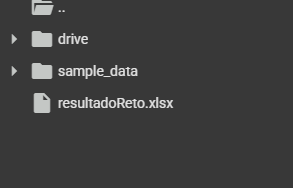
